In [1]:
import numpy as np
import json
import os 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [2]:
import numpy as np
import json
import os

# Base path
base_path = "python_ML/data/features"

# Load features
X_train = np.load(os.path.join(base_path, "X_train.npy"))
X_val   = np.load(os.path.join(base_path, "X_val.npy"))
X_test  = np.load(os.path.join(base_path, "X_test.npy"))

# Load labels
y_train = np.load(os.path.join(base_path, "y_train.npy"))
y_val   = np.load(os.path.join(base_path, "y_val.npy"))
y_test  = np.load(os.path.join(base_path, "y_test.npy"))

# Load class names (json)
with open(os.path.join(base_path, "class_names.json"), "r") as f:
    class_names = json.load(f)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Classes:", class_names)


X_train shape: (594, 2048)
y_train shape: (594,)
Classes: {'beagle': 0, 'chihuahua': 1, 'german_shepherd': 2, 'golden_retriever': 3, 'pug': 4}


In [3]:
X_train

array([[0.3804918 , 0.56972146, 0.24807486, ..., 0.20672771, 0.7753163 ,
        0.53838444],
       [0.02988609, 0.2683468 , 0.27593413, ..., 0.23005608, 0.2087485 ,
        0.31624484],
       [0.48015815, 0.5456376 , 1.7757732 , ..., 0.03930489, 0.36964107,
        0.08132643],
       ...,
       [0.9648989 , 0.57197744, 0.3045635 , ..., 0.18017392, 0.37894288,
        0.28125486],
       [0.24333335, 0.32081798, 0.32464114, ..., 0.08393573, 0.18157099,
        0.12161604],
       [0.29439414, 0.3766734 , 0.327757  , ..., 0.07907001, 0.8013845 ,
        0.67063975]], shape=(594, 2048), dtype=float32)

In [4]:
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

{np.int64(0): np.int64(137), np.int64(1): np.int64(106), np.int64(2): np.int64(106), np.int64(3): np.int64(105), np.int64(4): np.int64(140)}


In [5]:
model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [6]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0],
       [ 0,  0, 23,  0,  0],
       [ 0,  0,  0, 23,  0],
       [ 0,  1,  0,  0, 29]])

In [7]:
accuracy_score(y_test, y_pred)

0.9921875

In [8]:
print(classification_report(y_test, y_pred, target_names=class_names))

                  precision    recall  f1-score   support

          beagle       1.00      1.00      1.00        29
       chihuahua       0.96      1.00      0.98        23
 german_shepherd       1.00      1.00      1.00        23
golden_retriever       1.00      1.00      1.00        23
             pug       1.00      0.97      0.98        30

        accuracy                           0.99       128
       macro avg       0.99      0.99      0.99       128
    weighted avg       0.99      0.99      0.99       128



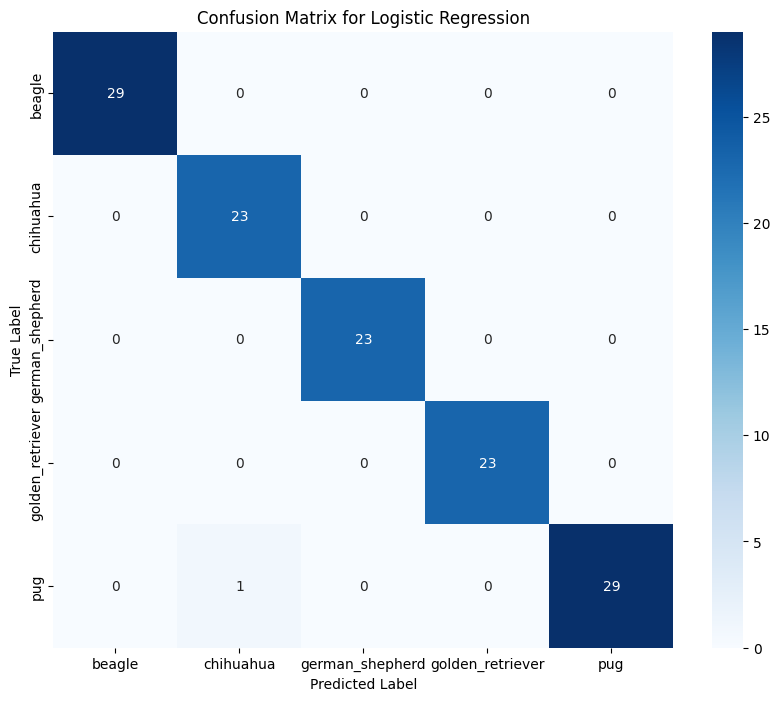

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels
)
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

/tmp/ipykernel_10652/2361980052.py:24: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  legend1 = plt.legend(


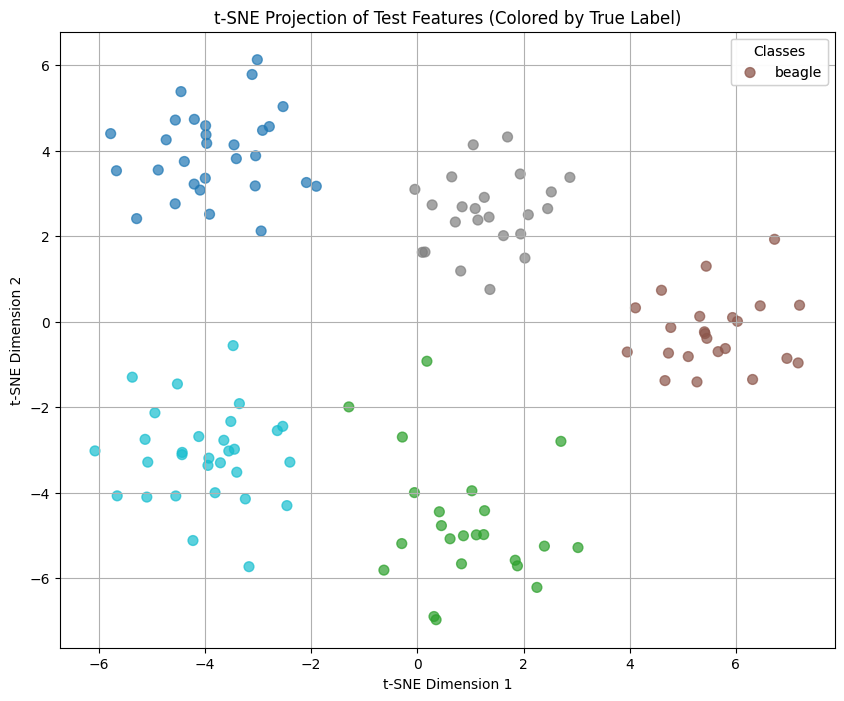

In [11]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 1. Standardize features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# 2. Run t-SNE on the Test Features
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_test_tsne = tsne.fit_transform(X_test_scaled)

# 3. Plot the t-SNE projection
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_test_tsne[:, 0],
    X_test_tsne[:, 1],
    c=y_test, 
    cmap='tab10',
    s=50,
    alpha=0.7
)

# Add a legend for the classes
legend1 = plt.legend(
    *scatter.legend_elements(),
    title="Classes",
    labels=class_labels,
    loc="best"
)
plt.gca().add_artist(legend1)

plt.title('t-SNE Projection of Test Features (Colored by True Label)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()